In this notebook we will explore the Medicare Part D prescribing data that was released through the CMS data portal at https://data.cms.gov/resource/4uvc-gbfz. The goal is to demonstrate how this data can be used to find prescribers who prescribe in a similar way. For a psychiatrist in Washington, D.C. we will determine which prescribers prescribe most closely by computing a distance matrix based on the total claims. More information about the data can be found at [Prescriber_Methods.pdf](https://data.cms.gov/api/views/4uvc-gbfz/files/9hYW-2MBrXAbhKuRXBE0AMbG7pRA5Q0MQCsDIJzlkTI?download=true&filename=Prescriber_Methods.pdf).

In [1]:
import pandas as pd

In [2]:
md_base_url = "https://data.cms.gov/resource/4uvc-gbfz" # URL For The Data

The data set contains 23,650,520 rows. We are not going to pull the entire data set down but a subset of the data.  To determine which state to pull down we use the Socrata SODA API to do the computation server side.

In [3]:
count_url = md_base_url + "?" + "$select=count(*)"
print(count_url)
pd.read_json(count_url)

https://data.cms.gov/resource/4uvc-gbfz?$select=count(*)


,count
0,23645873


In [4]:
count_by_state_url = md_base_url + "?" + "$select=nppes_provider_state,count(nppes_provider_state)&$group=nppes_provider_state"
print(count_by_state_url)
by_state_df = pd.read_json(count_by_state_url)
new_state_df = by_state_df[by_state_df.count_nppes_provider_state < 50000]
new_state_df

https://data.cms.gov/resource/4uvc-gbfz?$select=nppes_provider_state,count(nppes_provider_state)&$group=nppes_provider_state


,count_nppes_provider_state,nppes_provider_state
0,49,AS
1,30,AA
2,25,XX
3,348,MP
4,240,AE
5,2738,VI
6,1816,GU
7,1072,ZZ
8,28329,AK
10,95,AP


In [ ]:
import requests

In [52]:
validStates=new_state_df["nppes_provider_state"].tolist()

In [7]:
while True:
    state = input("State Initials AS, AA, XX, MP, AE, VI, GU, ZZ, AK, AP, WY, DC \n")
    if state in validStates:
        break
    print("Invalid State")

r = requests.get(md_base_url, params={'$where': "nppes_provider_state='"+ state.upper() +"'", "$limit": 50000})

State Initials AS, AA, XX, MP, AE, VI, GU, ZZ, AK, AP, WY, DCDC


In [8]:
r.headers

{'Server': 'nginx', 'Date': 'Mon, 01 Jul 2019 20:16:05 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '264ecq294ribbpifb431kzsag', 'Access-Control-Allow-Origin': '*', 'ETag': '"d1fb48077da89160bb0b612042038014--gzip"', 'Last-Modified': 'Wed, 14 Nov 2018 19:13:19 UTC', 'X-SODA2-Warning': 'X-SODA2-Fields, X-SODA2-Types, and X-SODA2-Legacy-Types are deprecated', 'X-SODA2-Fields': '["drug_name","total_day_supply","npi","nppes_provider_first_name","total_claim_count_ge65","generic_name","total_30_day_fill_count_ge65","specialty_desc","total_day_supply_ge65","total_claim_count","ge65_redact_flag","nppes_provider_city","total_30_day_fill_count","bene_count_ge65","nppes_provider_state","nppes_provider_last_org_name","total_drug_cost","description_flag","bene_count_ge65_redact_flag","total_drug_cost_ge65","bene_count"]', 'X-SODA2-Types': '["text","number","text","text","number","text","number","text","n

In [9]:
prescriber_df = pd.read_json(r.content)

In [10]:
# Uncomment if you are unable to install the requests library
# prescriber_df = pd.read_json(prescriber_url)

In [11]:
prescriber_df.head(10)

,bene_count,bene_count_ge65,bene_count_ge65_redact_flag,description_flag,drug_name,ge65_redact_flag,generic_name,npi,nppes_provider_city,nppes_provider_first_name,...,nppes_provider_state,specialty_desc,total_30_day_fill_count,total_30_day_fill_count_ge65,total_claim_count,total_claim_count_ge65,total_day_supply,total_day_supply_ge65,total_drug_cost,total_drug_cost_ge65
0,11.0,NaN,*,S,ACETAMINOPHEN-CODEINE,*,ACETAMINOPHEN WITH CODEINE,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,17.0,NaN,17,NaN,157,NaN,119.95,NaN
1,22.0,NaN,*,S,AMLODIPINE BESYLATE,NaN,AMLODIPINE BESYLATE,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,103.0,46.0,103,46.0,3090,1380.0,647.42,268.40
2,17.0,NaN,*,S,AMOXICILLIN,*,AMOXICILLIN,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,28.0,NaN,28,NaN,220,NaN,193.16,NaN
3,11.0,NaN,*,S,ATORVASTATIN CALCIUM,NaN,ATORVASTATIN CALCIUM,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,52.1,13.0,52,13.0,1562,390.0,1005.65,248.76
4,20.0,NaN,*,S,AZITHROMYCIN,NaN,AZITHROMYCIN,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,30.0,11.0,30,11.0,169,74.0,311.78,132.02
5,NaN,NaN,*,S,CARVEDILOL,*,CARVEDILOL,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,12.0,NaN,12,NaN,360,NaN,99.48,NaN
6,NaN,NaN,*,S,CELEBREX,NaN,CELECOXIB,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,25.0,14.0,25,14.0,750,420.0,4300.21,2364.42
7,NaN,NaN,*,S,CILOSTAZOL,NaN,CILOSTAZOL,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,27.0,11.0,27,11.0,810,330.0,692.54,217.72
8,NaN,NaN,*,S,CLONIDINE HCL,NaN,CLONIDINE HCL,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,26.0,13.0,26,13.0,780,390.0,191.87,113.48
9,NaN,NaN,*,S,COLCRYS,*,COLCHICINE,1003005661,WASHINGTON,ADEFOLAJU,...,DC,General Practice,12.0,NaN,12,NaN,360,NaN,2144.98,NaN


In [12]:
prescriber_df = prescriber_df.sort_values(by=["specialty_desc","npi","drug_name"])

A prescriber is identified by the NPI (National Provider Identifier). The NPI is a 10-digit number. We will use the Bloom API as an example of what information is linked to the NPI for a prescriber. This NPI associated data is self-reported by the provider. When a provider writes a prescription and the prescription is filled by a patient the NPI and the drug prescribed is recorded in the Medicare claims database. This data was aggregated over calendar year 2013 to form the underlying database.  This allows us to connect what drugs the prescriber prescribed to Medicare members. A prescriber may prescribe to other patients not in Medicare. This data is not in this data set. To protect the privacy of individuals only drugs with more than 11 claims during the year are included in this data set.

In [13]:
len("1487818670")

10

In [14]:
#r = requests.get("http://www.bloomapi.com/api/search", 
#                 params={"limit": 10,"offset": 0, "key1": "npi", "op1": "eq", "value1": 1487818670})
#r.json()

In [15]:
# prescriber_df.to_csv("./data/medicare_dc_prescriber_raw_2013.csv")
# Uncomment last line if there are API Connection Problems
# prescriber_df = pd.read_csv("./data/medicare_dc_prescriber_raw_2013.csv")

In [16]:
import numpy as np

In [17]:
npi_drug_cross_df = pd.crosstab(prescriber_df["npi"], prescriber_df["drug_name"], values=prescriber_df["total_claim_count"], 
                                  aggfunc=np.sum)

If you have worked with Microsoft Excel you might be familiar with the concept of a pivot table. We want to create a dataframe where each row is a prescriber identified by their NPI and the columns of the table are the names of the drugs.

In [18]:
npi_drug_cross_df.head(5)

drug_name,ABACAVIR,ABILIFY,ABILIFY DISCMELT,ACARBOSE,ACCUPRIL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACIPHEX,ACTONEL,ACTOS,...,ZIPRASIDONE HCL,ZOCOR,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZYMAXID,ZYPREXA,ZYTIGA
npi,,,,,,,,,,,,,,,,,,,,,
1003005661,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1003012063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003042474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003107541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003112434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To replace the NaN (not a number) from the cells with zero the `fillna()` method is used.

In [19]:
npi_drug_cross_df = npi_drug_cross_df.fillna(0)

Now it is simple to find the total number of claims for the drug Abilify.

In [20]:
npi_drug_cross_df["ACETAMINOPHEN-CODEINE"].sum()

10476.0

To count the number of drugs we will add a new field called `drug_count` to the dataframe. Then we will use the `groupby()` and `agg()` methods to create a new dataframe. 

In [21]:
prescriber_df["drug_count"] = 1

In [22]:
prescriber_specialty_df = prescriber_df.groupby(["npi","specialty_desc"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

To merge the tables we need to flatten the indices.

In [23]:
prescriber_specialty_df.reset_index(level=["npi","specialty_desc"], inplace=True)

In [24]:
prescriber_specialty_df.head(10)

,npi,specialty_desc,total_claim_count,drug_count
0,1003005661,General Practice,1253,35
1,1003012063,Internal Medicine,310,14
2,1003042474,Emergency Medicine,73,4
3,1003107541,Student in an Organized Health Care Education/...,70,4
4,1003112434,Student in an Organized Health Care Education/...,14,1
5,1003125253,Psychiatry & Neurology,61,3
6,1003128810,Internal Medicine,11,1
7,1003137480,Ophthalmology,11,1
8,1003172446,Student in an Organized Health Care Education/...,96,6
9,1003179474,Student in an Organized Health Care Education/...,30,2


In [25]:
prescriber_specialty_drugs_df = pd.merge(prescriber_specialty_df, npi_drug_cross_df.reset_index(level=["npi"]), on="npi")

In [26]:
prescriber_specialty_drugs_df.head(5)

,npi,specialty_desc,total_claim_count,drug_count,ABACAVIR,ABILIFY,ABILIFY DISCMELT,ACARBOSE,ACCUPRIL,ACETAMINOPHEN-CODEINE,...,ZIPRASIDONE HCL,ZOCOR,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZYMAXID,ZYPREXA,ZYTIGA
0,1003005661,General Practice,1253,35,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003012063,Internal Medicine,310,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003042474,Emergency Medicine,73,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003107541,Student in an Organized Health Care Education/...,70,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003112434,Student in an Organized Health Care Education/...,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we will show that different medical specialties prescribe different numbers of drugs. We expect that internal medicine which see a large number of different patients will prescribe the most number of drugs compared to a specialized field such as psychiatry.

In [27]:
import seaborn as sb

In [28]:
%matplotlib inline

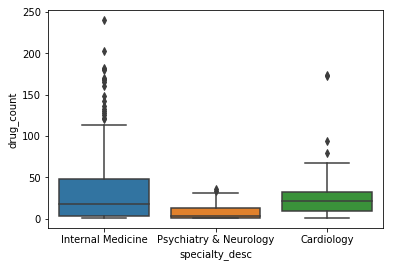

In [29]:
sb.boxplot(x="specialty_desc", y="drug_count", 
           data=prescriber_specialty_drugs_df[(prescriber_specialty_drugs_df["specialty_desc"] == "Cardiology") |
           (prescriber_specialty_drugs_df["specialty_desc"] == "Internal Medicine") |
           (prescriber_specialty_drugs_df["specialty_desc"] == "Psychiatry & Neurology")]
          )

Next we will build the dataframes and corresponding matrices to compute the euclidean distance between two Medicare prescribers in DC. Rather than creating a crosstab by `"drug_name"` we will use the `"generic_name"`. The branded drug Abilify has the generic name of ARIPiprazole. A great tool for understanding the relationship between active ingredients, generic name and branded product is [RxNav](https://rxnav.nlm.nih.gov/).

In [30]:
npi_generic_cross_df = pd.crosstab(prescriber_df["npi"], prescriber_df["generic_name"], values=prescriber_df["total_claim_count"], 
                                  aggfunc=np.sum)

In [31]:
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [32]:
npi_generic_cross_df.head(5)

generic_name,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABIRATERONE ACETATE,ACARBOSE,ACETAMINOPHEN WITH CODEINE,ACETAZOLAMIDE,ACITRETIN,...,VILAZODONE HYDROCHLORIDE,WARFARIN SODIUM,ZAFIRLUKAST,ZALEPLON,ZANAMIVIR,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
npi,,,,,,,,,,,,,,,,,,,,,
1003005661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
1003012063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003042474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003107541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003112434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
npi_generic_cross_df.columns

Index(['0.9 % SODIUM CHLORIDE', 'ABACAVIR SULFATE',
       'ABACAVIR SULFATE/LAMIVUDINE', 'ABACAVIR/LAMIVUDINE/ZIDOVUDINE',
       'ABATACEPT', 'ABIRATERONE ACETATE', 'ACARBOSE',
       'ACETAMINOPHEN WITH CODEINE', 'ACETAZOLAMIDE', 'ACITRETIN',
       ...
       'VILAZODONE HYDROCHLORIDE', 'WARFARIN SODIUM', 'ZAFIRLUKAST',
       'ZALEPLON', 'ZANAMIVIR', 'ZIDOVUDINE', 'ZIPRASIDONE HCL',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', name='generic_name', length=746)

In [34]:
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [35]:
prescriber_specialty_generic_df.head(5)

,npi,specialty_desc,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABIRATERONE ACETATE,...,VILAZODONE HYDROCHLORIDE,WARFARIN SODIUM,ZAFIRLUKAST,ZALEPLON,ZANAMIVIR,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1003005661,General Practice,1253,35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
1,1003012063,Internal Medicine,310,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003042474,Emergency Medicine,73,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003107541,Student in an Organized Health Care Education/...,70,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003112434,Student in an Organized Health Care Education/...,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_desc", "npi"])

In [37]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\Users\John Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [38]:
pf_matrix.shape

(2519, 746)

In [39]:
identifiers_matrix = prescriber_specialty_df.iloc[:,0:2].as_matrix()

C:\Users\John Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [40]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [41]:
import scipy.spatial

In [42]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [43]:
normalized_pf_matrix.shape

(2519, 746)

In [44]:

validMetrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming',\
'jaccard', 'jensenshannon', 'kulsinski', "russellrao",'mahalanobis''matching','minkowski',\
           'rogerstanimoto','russellrao','seuclidean','sokalmichener','sokalsneath','sqeuclidean','yule']
def Compare_Dm(validMetrics):
    dmDict = {}
    counter = 0
    while counter<len(validMetrics):
        userInput = input("Distance Metrics: \nBraycurtis \tCanberra \tChebyshev \nCityblock \tCorrelation \tCosine \nDice\t \tEuclidean \tHamming \nJaccard \tJensenshannon \tKulinski \nRussellrao \tMatching \tMinkowski \nMahalanobis \tRogerstanimoto \tSeuclidean \nSokalmichener \tSokalsneath \tSqeuclidean \nYule \n\nOther Commands: \nRestart \nDone \n\n")
        userInput = str(userInput.lower())
        if userInput == "done":
            return (dmDict)
        elif userInput == "restart":
            dmDict = {}
            counter = 0
            print("Distance Metrics Cleared")
        elif userInput in dmDict:
            print("Duplicate Distance Metric")
        elif userInput not in validMetrics:
            print("Invalid Input")
        else:
            dmDict[userInput] = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, userInput))
            print(userInput + " generated")
            counter += 1
    return(dmDict)


In [53]:

distanceGraphs = Compare_Dm(validMetrics)

Distance Metrics: 
Braycurtis 	Canberra 	Chebyshev 
Cityblock 	Correlation 	Cosine 
Dice	 	Euclidean 	Hamming 
Jaccard 	Jensenshannon 	Kulinski 
Russellrao 	Matching 	Minkowski 
Mahalanobis 	Rogerstanimoto 	Seuclidean 
Sokalmichener 	Sokalsneath 	Sqeuclidean 
Yule 

Other Commands: 
Restart 
Done 

done


In [54]:
print(distanceGraphs)

{}


In [55]:
for key in distanceGraphs:
    
    print(str(distanceGraphs[key].shape) + "\t"+key)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:


if (len(distanceGraphs) % 5 == 0):
    numRows = len(distanceGraphs) // 5
else:
    numRows = len(distanceGraphs) // 5 + 1


plt.rcParams['figure.figsize'] = [25,5 * numRows]
plt.rcParams['font.size'] = 13
#plt.set_cmap("cmap") cmap is replaced with a registered color map


0


In [58]:
#for key in distanceGraphs:
    
#    print(distanceGraphs[key])

In [59]:
rows= 0
columns = 0
fig, axes = plt.subplots(numRows,5)
for keys in distanceGraphs:
    #print(keys)
    #print(distanceGraphs[keys])
    if columns == 5:
        columns = 0
        rows += 1
    if numRows == 1: #only takes columns argument if there is 1 row
        axes[columns].matshow(distanceGraphs[keys])
        axes[columns].set_title(keys, fontsize = 20, pad =20)
    elif numRows == 0:
        print("No Distance Matrix Selected")
    else:
        axes[rows,columns].matshow(distanceGraphs[keys])
        axes[rows,columns].set_title(keys, fontsize = 20, pad = 20)
    columns += 1

<Figure size 1800x0 with 0 Axes>